In [56]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy
from sklearn.metrics import roc_curve , auc, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
from imblearn.over_sampling import SMOTE

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# in our case params is the number of nearest neighbours
def modelTrain(models, params, trainX, trainY, validX, validY):
    models_auc = []
    for i, model in enumerate(models):
        model.fit(trainX, trainY)
        yPredicted = model.predict_proba(validX)
        fpr, tpr, _ = roc_curve(validY, yPredicted[:,1])
        ar = auc(fpr, tpr)
        models_auc.append(ar)
        print('Model number {}. Number of neighbors = {}, AUC = {}'.format(i, params[i], ar))
    return models, models_auc

In [5]:
features = pd.read_csv('modifiedTraining.csv')
labels = pd.read_csv('labels.csv')

In [6]:
features.shape

(15419, 159)

In [7]:
labels.shape

(15419, 1)

In [8]:
trainingX, testX, trainingY, testY = train_test_split(features, labels, random_state=1, test_size=0.2)

In [9]:
sm = SMOTE()

In [10]:
trainX, validationX, trainY, validationY = train_test_split(trainingX, trainingY, random_state=1, test_size=0.2) 

In [11]:
x,y = sm.fit_sample(trainX, trainY.squeeze())

In [12]:
from collections import Counter
Counter(y)

Counter({0.0: 9257, 1.0: 9257})

In [13]:
noOfNeighbors = list(range(2,101))

In [15]:
models = []
for neighbors in noOfNeighbors:
    models.append(KNeighborsClassifier(n_neighbors=neighbors))

In [16]:
models, roc_auc = modelTrain(models, noOfNeighbors, x, y, validationX, validationY)

Model number 0. Number of neighbors = 2, AUC = 0.5566735739043316
Model number 1. Number of neighbors = 3, AUC = 0.552356550363719
Model number 2. Number of neighbors = 4, AUC = 0.5397726212033528
Model number 3. Number of neighbors = 5, AUC = 0.5357449549162732
Model number 4. Number of neighbors = 6, AUC = 0.5395781606835054
Model number 5. Number of neighbors = 7, AUC = 0.5402159911886049
Model number 6. Number of neighbors = 8, AUC = 0.5346466419001749
Model number 7. Number of neighbors = 9, AUC = 0.5281625503263825
Model number 8. Number of neighbors = 10, AUC = 0.5289995084038058
Model number 9. Number of neighbors = 11, AUC = 0.5288283831463401
Model number 10. Number of neighbors = 12, AUC = 0.5297897959564658
Model number 11. Number of neighbors = 13, AUC = 0.5346808669516679
Model number 12. Number of neighbors = 14, AUC = 0.5315741656865856
Model number 13. Number of neighbors = 15, AUC = 0.5313128107479107
Model number 14. Number of neighbors = 16, AUC = 0.5240944362511746

In [46]:
finalModel = KNeighborsClassifier(n_neighbors=100)

In [47]:
finalModel.fit(x,y)
yPredicted = finalModel.predict(testX)

In [48]:
yPred = finalModel.predict_proba(testX)

In [49]:
confusion_matrix(testY, yPredicted)

array([[1624, 1286],
       [  84,   90]])

In [50]:
fpr, tpr, _ = roc_curve(testY, yPred[:,1])

In [51]:
auc(fpr, tpr)

0.548689615673263

In [52]:
import matplotlib.pyplot as plt

(-0.01, 1.01)

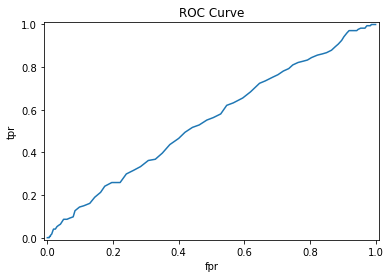

In [53]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)

# Training model without using validation set

In [36]:
x1, y1 = sm.fit_sample(trainingX, trainingY.squeeze())

In [76]:
model = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
model.fit(x1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [77]:
yPredicted = model.predict(testX)
yPredProb = model.predict_proba(testX)

In [78]:
confusion_matrix(testY, yPredicted)

array([[1659, 1251],
       [  91,   83]])

In [79]:
roc_auc_score(testY, yPredProb[:,1])

0.54681439349054

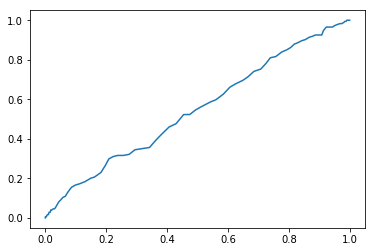

In [80]:
fpr, tpr, _ = roc_curve(testY, yPredProb[:,1])
plt.plot(fpr, tpr)

In [65]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca